# Prevendo vendas de sorvetes com base na temperatura

In [3]:
import pandas as pd # utilizado para trabalhar com a base de dados (arquivos)
import matplotlib.pyplot as plt # trabalhar com gráficos

from sklearn.model_selection import train_test_split # separar dados entre train e test
from sklearn.linear_model import LinearRegression # algoritmo de regressão linear
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # métricas de validação do modelo

# Importando a base de dados
dados = pd.read_excel("Sorvete.xlsx")
dados.head()

,Temperatura,Vendas_Sorvetes
0,26,268.125258
1,39,403.562400
2,34,339.279899
3,30,310.035329
4,27,273.616360


Gráfico para visualizar melhor os dados de vendas em relação à temperatura

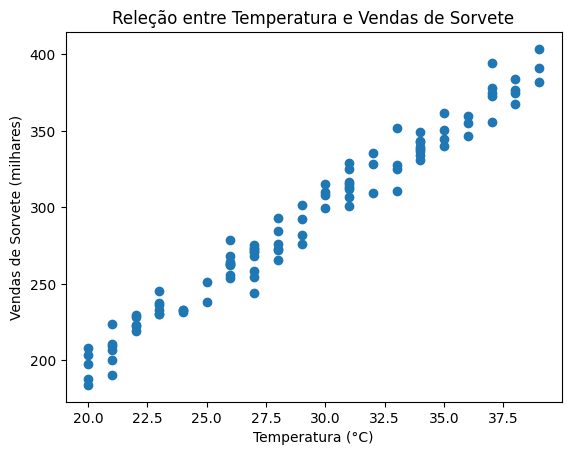

In [4]:
# Visualizando os dados
plt.scatter(dados['Temperatura'], dados['Vendas_Sorvetes']) # cria um gráfico (x,y)
plt.xlabel('Temperatura (°C)') # label do eixo x
plt.ylabel('Vendas de Sorvete (milhares)') # label do eixo y
plt.title('Releção entre Temperatura e Vendas de Sorvete') # título do gráfico
plt.show()

Observando o gráfico percebemos a correlação entre a temperatura e as vendas de sorvete. Olhando o gráfico podemos notar um linearidade dos dados, então podemos dizer que é uma regressão linear.

In [5]:
dados.corr()

,Temperatura,Vendas_Sorvetes
Temperatura,1.000000,0.985589
Vendas_Sorvetes,0.985589,1.000000


A função **dados.corr()** é uma função da pandas para ver a correção entre dados. No caso do exemplo a relação entre temperatura com ela mesma é perfeita, pois ela está sendo comparada com ela mesma. A relação entre temperatura e a vendas de sorvete é de 98, quase perfeita, ou seja, os dados possuem uma forte correlação.

# Criando o modelo de regressão

Formula da regressão linear simples:
y = a + Bx + e

y -> Variável resposta (ex: vendas de sorvete)<br/>
a (alfa) -> Intercepto, é o momento da inclinação da reta<br/>
B (beta) -> Coeficiente angular, determina o quanto a reta será inclinada, ela determinará se a relação entre as variáveis é pequena ou grande<br/>
x -> Variável explicativa, ou independente (ex: temperatura)<br/>
e (erro) -> variável que considera os resíduos dos dados. OBS: soma dos erros quadrados dos resíduos<br/>

O objetivo da regrassão linear é encontrar os valores de **a** e **B** que **minimizam a soma dos erros quadrados dos resíduos e (erro)**.

In [6]:
# Dividindo os dados em conjuntos de treinamento e teste
X = dados[['Temperatura']] # Recurso (variável independente)
y = dados['Vendas_Sorvetes'] # Rótulo (variável dependente)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X_train.shape # tamanho da base de dados de treino (qtd, numero_da_coluna (temperatura))

(80, 1)

In [9]:
X_test.shape # tamanho da base de dados de teste (qtd, numero_da_coluna (temperatura))

(20, 1)

In [11]:
# Criando e treinando o modelo de regrassão linear
modelo = LinearRegression() # possui parâmetros para alterar as variáveis da formula (alfa, beta e outros). Por padrão as variáveis possuem um valor default
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_test)

# Avaliando os resultados

Vamos avaliar o modelo com as seguintes métricas:

**RMSE**: é a raiz quadrada do **MSE** (Erro Quadrático Médio - Mean Squared Error). O MSE é a média dos quadrados das diferenças entre os valores reais e os valores previtos. OBS: O R do RMSE é de root.

**MAE**: Erro Médio Absoluto, Mean Absulute Error, onde um valor pequeno para MAE significa que suas previsões estão próximas das reais.

**R-squared (R2)**: Fornece informações sobre o ajuste geral do modelo. O valor do R2 pode variar entre 0 e 1, quato mais próximo de 1, melhor, pois indica que o modelo explica uma maior proporção da variabilidade nos dados.

Erro Médio Quadrático: 101.64524989805876
Erro Absoluto Medio: 7.6809927436910055
R² (Coeficiente de determinação): 0.9594169633031285


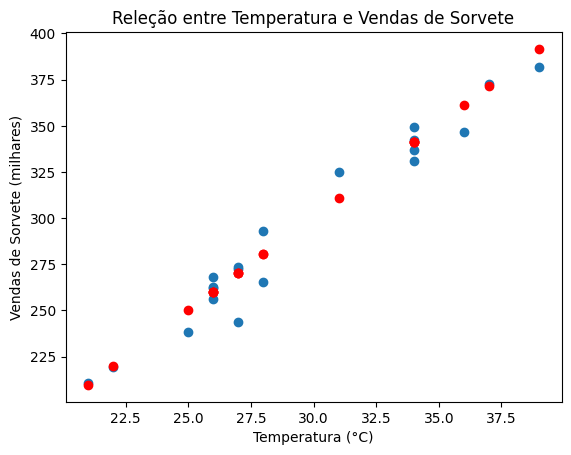

In [12]:
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Medio: {erro_absoluto_medio}')
print(f'R² (Coeficiente de determinação): {r_quadrado}')

# Visualizando as previsões
plt.scatter(X_test, y_test, label='Real')
plt.scatter(X_test, previsoes, label='Previsto', color='red')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvete (milhares)')
plt.title('Releção entre Temperatura e Vendas de Sorvete')
plt.show()